In [2]:
# try load xml
import xml.etree.ElementTree as ET
tree = ET.parse("mono/NLLB/xml/ban/NLLB.xml")

In [89]:
import pandas as pd
import re

In [3]:
root = tree.getroot()

In [29]:
df = pd.DataFrame([{"sentence" : ' '.join([w.text for w in r]), "lang_score": float(r.attrib["langidscore"]), "url": r.attrib["url"]} for r in root])

In [42]:
!wget https://dl.fbaipublicfiles.com/nllb/lid/lid218e.bin

--2024-05-31 05:10:53--  https://dl.fbaipublicfiles.com/nllb/lid/lid218e.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.161.213.24, 3.161.213.42, 3.161.213.84, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.161.213.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1176355829 (1.1G) [application/octet-stream]
Saving to: ‘lid218e.bin’

lid218e.bin         100%[===================>]   1.09G   340MB/s    in 3.6s    

2024-05-31 05:10:57 (314 MB/s) - ‘lid218e.bin’ saved [1176355829/1176355829]



In [59]:
lid_langs, lid_scores = model.predict(df["sentence"].tolist(), k=1)
df["lid_lang"] = [l[0].replace('__label__', '') for l in lid_langs]
df["lid_score"] = [s[0] for s in lid_scores]

In [ ]:
lid_lang
ban_Latn    408647
ind_Latn     19024
jav_Latn     12710
zsm_Latn      5232
eng_Latn      5116

In [82]:
filtered_df = df[df.lid_lang == "ban_Latn"]
filtered_df = filtered_df[filtered_df.lid_score > 0.95]
filtered_df = filtered_df[filtered_df.sentence.apply(lambda x: x.count("ring")) < 4]

In [90]:
def clean_text(text):
    """Remove unwanted special characters from a given text."""
    pattern = r'[^a-zA-Z0-9\s.,!?;:\'"\-\(\)\[\]\{\}\<\>\+=\*/%<>^&|~`]'
    return re.sub(pattern, '', text)

In [98]:
from transformers import AutoTokenizer
import os
os.environ["HF_TOKEN"] = 'hf_something'
tokenizer = AutoTokenizer.from_pretrained("Yellow-AI-NLP/komodo-7b-base", trust_remote_code=True)

Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


bahasallamatokenizer.py:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

In [104]:
tokenizer(filtered_df.loc[8].sentence)

"<s> 【 RL 】 : 「 ─ Ring a ring o'ring ading ring a ding flame . 」"

In [105]:
filtered_df.sentence.str.replace(r'[】】【】」「]', '', regex=True)

3                           ! 7 Shuttle ring ( outer ring )
7         " " ' Lady and the Tramp " " ' inggih punika f...
8         " " Kaléndér sané kaanggen ring rahina mangkin...
9         " " Kaléndér sané kaanggenkaanggén ring rahina...
10        " " Kaléndér sané kaanggén ring rahina mangkin...
                                ...                        
463988                                     Ring ring X'mas 
463994     yihh ! ! nggih pak , tiang mebalih taler duga...
464011     RL  :  ─ Ring a ring o'ring ading ring a ding...
464019                ・ Bearing ( inner ring & outer ring )
464020       ・ Bearing ( inner ring & outer ring ) / Roller
Name: sentence, Length: 148150, dtype: object

In [103]:
filtered_df.sentence

3                           ! 7 Shuttle ring ( outer ring )
7         " " ' Lady and the Tramp " " ' inggih punika f...
8         " " Kaléndér sané kaanggen ring rahina mangkin...
9         " " Kaléndér sané kaanggenkaanggén ring rahina...
10        " " Kaléndér sané kaanggén ring rahina mangkin...
                                ...                        
463988                                  「 Ring ring X'mas 」
463994    「 yihh ! ! nggih pak , tiang mebalih taler dug...
464011    【 RL 】 : 「 ─ Ring a ring o'ring ading ring a d...
464019                ・ Bearing ( inner ring & outer ring )
464020       ・ Bearing ( inner ring & outer ring ) / Roller
Name: sentence, Length: 148150, dtype: object

In [85]:
filtered_df.loc[464011].sentence

"【 RL 】 : 「 ─ Ring a ring o'ring ading ring a ding flame . 」"

In [77]:
model.predict([filtered_df.loc[464010].sentence], k=3)

([['__label__ban_Latn', '__label__eng_Latn', '__label__kor_Hang']],
 [array([9.9939930e-01, 4.6574528e-04, 9.3551498e-05], dtype=float32)])

In [70]:
filtered_df.sort_values(by="lid_score", ascending=False).iloc[:100].sentence.tolist()

['Sane nenten sios indike punika jagi ngawinang iraga dados manusa sane manut ring agama , manusa sane maguna , sane uning ring angga .',
 'Sane napi ja sakaluire wantah nika sane',
 'Revolusi Ilmiah ngamolihang sokongan saking ( kauningannyane indik Johanner Gutenberg nuju Eropa saking genah nyetak , antuk soroh sané nénten magingsir , miwah sangkaning nemu kawéntenan teleskop taler mikroskop .',
 'Revolusi Meksiko miwah nénten stabilnyané pamréntah selanturnyané , taler Perang Dunia I , nanggehang pakaryan punika selami dasa warsa .',
 '171 kaca ring sor puniki wénten ring kategori puniki , saking 171 akéhnyané .',
 '17 genah sane wenten ring jagat Mengwi',
 'tatwagama sané pinaka unteng',
 'Respons stres puniki taler mresidayang ngawé ipun mahurip ring kahanan ruang sané berat pisan , yadiastun evolusi taler ngwatesin ngawigunayang pinaka analog antuk kahuripan tiosan ring bumi .',
 'tatu sane misi getih sane ngeranayang sakit',
 'kepanggih , wenten raris kapaica anak istri punika r

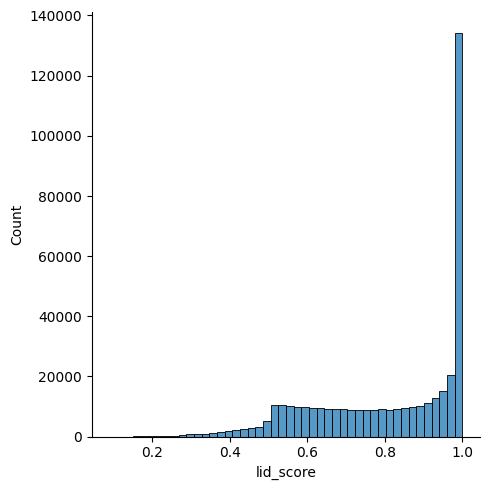

In [72]:
import seaborn as sns
sns.displot(filtered_df, x="lid_score", binwidth=0.02)

In [53]:
%time model.predict(df["sentence"].iloc[:1000].tolist(), k=1)

CPU times: user 160 ms, sys: 20.7 ms, total: 181 ms
Wall time: 163 ms


([['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__eng_Latn'],
  ['__label__ban_Latn'],
  ['__label__lmo_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__ban_Latn'],
  ['__label__jav_Latn'],


In [48]:
import fasttext
pretrained_lang_model = "/workspace/ALMA/lid218e.bin"
model = fasttext.load_model(pretrained_lang_model)
text = "Samalihipun semeton pacang gelis "
predictions = model.predict(text, k=3) 
print(predictions)

(('__label__jav_Latn', '__label__ind_Latn', '__label__zsm_Latn'), array([0.67172384, 0.21915324, 0.03755072]))


In [41]:
df[df.lang_score > 0.97].sample(10)

,sentence,lang_score,url
113089,Home _ Ring Making _ Ring Blanks _ Bog Oak Rin...,0.97904,https://www.greenvill.co.uk/crafts/ring-making...
380693,ngamiletin parindikané punika .,0.98027,https://issuu.com/epaper-kmb/docs/bpo23052010a
241359,"Sang Subudi malih nyelag , mataken ring Sang A...",0.98042,https://id.scribd.com/document/176458730/Buku-...
224986,Ring botani kawéntenan punika taler mamargi sa...,1.00001,_
137684,Kaceritayang ring luas nyimbarang wewidangan i...,1.00000,https://dictionary.basabali.org/Magibung
197416,Pararabine punika ngawinang ida nilar Ida Sang...,0.99816,http://alkitab.mobi/tb/1Ra/11/3/
22823,19 Wengine ring rahina Redite punika parasisia...,0.99993,_
144170,Kawéntenan radio komunitas galahé mangkin pate...,1.00001,https://issuu.com/epaper-kmb/docs/bpo_30012011
238847,"Samalihipun semeton pacang gelis seda irika , ...",0.99999,http://bibles.org/ban-BAN/Deut/11/
408865,ring pillow image 0 ring pillow newborn baby d...,0.97306,http://thedentistfinder.co/zl/r/


In [19]:
root[0].attrib["langidscore"]

{'id': '1',
 'langidscore': '0.74458',
 'source': 'crawl-data/CC-MAIN-2019-30/segments/1563195525659.27/wet/CC-MAIN-20190718145614-20190718171614-00450.warc.wet.gz',
 'url': 'https://id.scribd.com/document/346044024/Aircraft-Electrical-Systems-by-e-h-j-Pallett-n'}

In [110]:
!pip install mwxml wikiextractor

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached wikiextractor-3.0.6-py3-none-any.whl.metadata (7.3 kB)
Using cached wikiextractor-3.0.6-py3-none-any.whl (46 kB)
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [107]:
!wget https://dumps.wikimedia.org/banwiki/20240501/banwiki-20240501-pages-meta-history.xml.bz2

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
--2024-05-31 06:03:37--  https://dumps.wikimedia.org/banwiki/20240501/banwiki-20240501-pages-meta-history.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.71, 2620:0:861:3:208:80:154:71
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45657580 (44M) [application/octet-stream]
Saving to: ‘banwiki-20240501-pages-meta-history.xml.bz2’

banwiki-20240501-pa 100%[===================>]  43.54M  4.12MB/s    in 10s     

2024-05-31 06:03:48 (4.19 MB/s) - ‘banwiki-20240501-pages-meta-history.xml.bz2’ saved [45657580/45657580]



In [113]:
!mv banwiki-20240501-pages-meta-history.xml.bz2 wiki-dump/

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [112]:
!python -m wikiextractor.WikiExtractor /workspace/ALMA/banwiki-20240501-pages-meta-history.xml.bz2

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
INFO: Preprocessing '/workspace/ALMA/banwiki-20240501-pages-meta-history.xml.bz2' to collect template definitions: this may take some time.
INFO: Loaded 9671 templates in 26.3s
INFO: Starting page extraction from /workspace/ALMA/banwiki-20240501-pages-meta-history.xml.bz2.
INFO: Using 95 extract processes.
^C
Process ForkProcess-62:
Process ForkProcess-93:
Process ForkProcess-71:
Process ForkProcess-83:
Process ForkProcess-82:
Process ForkProcess-77:
Process ForkProcess-68:
Process ForkProcess-69:
Process ForkProcess-53:
Process ForkProcess-58:
Process ForkProcess-94:
Process ForkProcess-92:
Process ForkProcess-89:
Process ForkProcess-80:
Process ForkProcess-59:
Proce

In [109]:
import mwxml
import glob

paths = glob.glob('banwiki-20240501-pages-meta-history.xml.bz2')

def process_dump(dump, path):
  for page in dump:
    for revision in page:
        if revision.text is None:
            continue
        yield page.id, revision.id, revision.timestamp, revision.text,

count=0
for page_id, rev_id, rev_timestamp, rev_text in mwxml.map(process_dump, paths):
    print("\t".join(str(v) for v in [page_id, rev_id, rev_timestamp, rev_text]))
    count += 1
    if count > 15:
        break

1	1	2019-10-14T12:17:52Z	==This subdomain is reserved for the creation of a [[wikimedia:Our projects|Wikipedia]] in '''[[w:en:Bali|Bali]]''' language==

* Please '''do not start editing''' this new site. This site has a test project on the [[incubator:|Wikimedia Incubator]] (or on the [[betawikiversity:|Beta Wikiversity]] or on the [[oldwikisource:|Old Wikisource]]) and it will be imported to here.

* If you would like to help translating the interface to this language, please do not translate here, but go to [[translatewiki:|translatewiki.net]], a special wiki for translating the interface. That way everyone can use it on every wiki using the [[mw:|same software]].

* For information about how to edit and for other general help, see [[m:Help:Contents|Help on Wikimedia's Meta-Wiki]] or [[mw:Help:Contents|Help on MediaWiki.org]].

== Sister projects ==
<span class="plainlinks">
[//www.wikipedia.org Wikipedia] |
[//www.wiktionary.org Wiktionary] |
[//www.wikibooks.org Wikibooks] |
[//www

In [223]:
import re

def extract_and_split_sentences(file_path):
    # Read the entire file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Regular expression to match each document
    doc_pattern = re.compile(r'<doc id="\d+" url="[^"]+" title="[^"]+">([\s\S]*?)</doc>')

    # Find all documents in the text
    documents = doc_pattern.findall(text)

    # Function to split text into sentences
    def split_into_sentences(text):
        # Here, we use a simple regex to split by sentence-ending punctuation followed by a space or end of string
        sentence_pattern = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')
        return sentence_pattern.split(text)

    # Process each document
    for doc in documents:
        # Remove the title (first line) and everything before the first \n\n
        doc_content = re.split(r'\n\n', doc, 1)[-1].replace('\n\n', ' ').strip()

        sentences = split_into_sentences(doc_content)
        for sentence in sentences:
            sentence = sentence.strip()
            # Filter out sentences that contain &gt; or &lt;
            if len(sentence.split(' ')) > 5 and '&gt;' not in sentence and '&lt;' not in sentence:
                yield sentence.strip().replace('\n', ' ')

# Path to the text file
root_filepath = '/workspace/ALMA/wiki-dump/en/text/'
file_paths = os.listdir(root_filepath)

# Extract and split sentences

wiki_sentences = []

for wikidir in file_paths:
    for filename in os.listdir(os.path.join(root_filepath, wikidir)):
        file_path = os.path.join(root_filepath, wikidir, filename)
        extracted_sentences = list(extract_and_split_sentences(file_path))
        for s in extracted_sentences:
            if len(s.split(' ')) > 5:
                wiki_sentences.append(s)



In [224]:
import random
wiki_sentences = random.sample([w for w in wiki_sentences if len(w.split(' ')) < 25], 200000)

In [226]:
with open("backtranslation-ban/enban/test.en-ban.en") as f:
    sents = f.read().split('\n')

In [230]:
wiki_sentences = new_wiki_sentences[:150000] + sents

In [233]:
with open("backtranslation-ban/enban/test.en-ban.en", "w") as f:
    
    for s in new_wiki_sentences:
        f.write(s+"\n")

In [234]:
import json

with open("backtranslation-ban/enban/test.en-ban.json", "w") as f:
    json.dump([{"translation": {"ban": "blank", "en": s}} for s in new_wiki_sentences], f)

In [141]:
# try using vllm for batch inference

from vllm import LLM, SamplingParams

# Sample prompts.

# Create a sampling params object.
sampling_params = SamplingParams()

# Create an LLM.
llm = LLM(model="../alma-7b-v2")
# Generate texts from the prompts. The output is a list of RequestOutput objects
# that contain the prompt, generated text, and other information.


OSError: ../alma-7b-v2 does not appear to have a file named config.json. Checkout 'https://huggingface.co/../alma-7b-v2/None' for available files.

In [ ]:
%time

prompts = [f"Translate this from Balinese to English:\nBalinese: {w}\nEnglish: " for w in wiki_sentences]

outputs = llm.generate(prompts[:100], sampling_params)
# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

In [236]:
import pandas as pd


with open("backtranslation-ban/output/test-en-ban", "r") as f:
    ban_sentences = f.read().split('\n')

with open("backtranslation-ban/enban/test.en-ban.en", "r") as f:
    en_sentences = f.read().split('\n')

# df = pd.DataFrame({
#     "src_sentence": ban_sentences,
#     "tgt_sentence": en_sentences
# })

In [250]:
df_new = pd.concat([df, pd.DataFrame({'src_sentence': ban_sentences[:-1], 'tgt_sentence': en_sentences[:-1]})]).reset_index(drop=True)

In [169]:
# from transformers import AutoTokenizer
# import os
# os.environ["HF_TOKEN"] = "hf_xyz"

# MAX_TOKENS = 256

# tokenizer = AutoTokenizer.from_pretrained("Yellow-AI-NLP/komodo-7b-base", trust_remote_code=True)

Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


In [252]:
df_old = df
df = df_new

In [253]:
df = df[(df.src_sentence != '' )&(df.tgt_sentence != '')]

In [254]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1)
test, val = train_test_split(test, test_size=0.5)

In [255]:
import os
import json

direction_output_dir = "backtranslation-ban/training/banen"
# os.makedirs(direction_output_dir)

source = "ban"
target = "en"

for dff, subset in zip([train, test, val], ["train", "test", "valid"]):
    bitext_list = []


    with open(os.path.join(direction_output_dir, f"{subset}.{source}-{target}.{source}"), 'w') as src_outfile, open(os.path.join(direction_output_dir, f"{subset}.{source}-{target}.{target}"), 'w') as tgt_outfile:
        for i,row in dff.iterrows():
            bitext_list.append({
                "translation": {
                    source: row.src_sentence,
                    target: row.tgt_sentence
                }
            })
            src_outfile.write(row.src_sentence + '\n')
            tgt_outfile.write(row.tgt_sentence + '\n')

    with open(os.path.join(direction_output_dir, f"{subset}.{source}-{target}.json"), 'w') as j:
        json.dump(bitext_list, j)

In [217]:
df[df.src_sentence.str.len() < 5]

,src_sentence,tgt_sentence
